In [1]:
from music21 import * 

In [10]:
with open('environment.txt') as f:
    env = f.readlines()
# you may also want to remove whitespace characters like \n at the end of each line
env = [x.strip() for x in env]

In [ ]:
c

In [ ]:
# print list of all streams in the a score
o = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

In [3]:
#merge all streams into one score
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

NameError: name 'o' is not defined

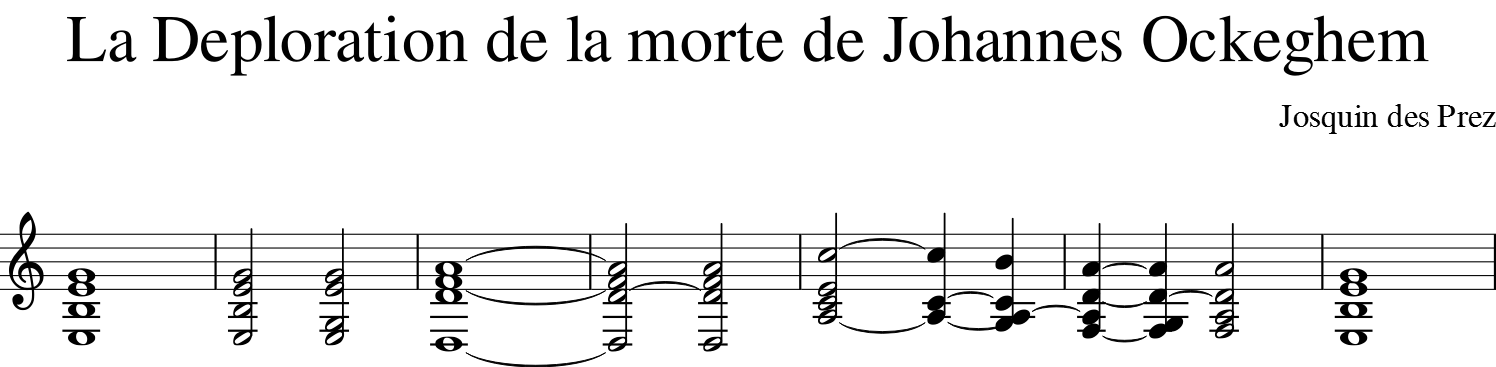

In [10]:
#chordify to make a reduction
reduction = scoreExcerpt.chordify()
reduction.show()

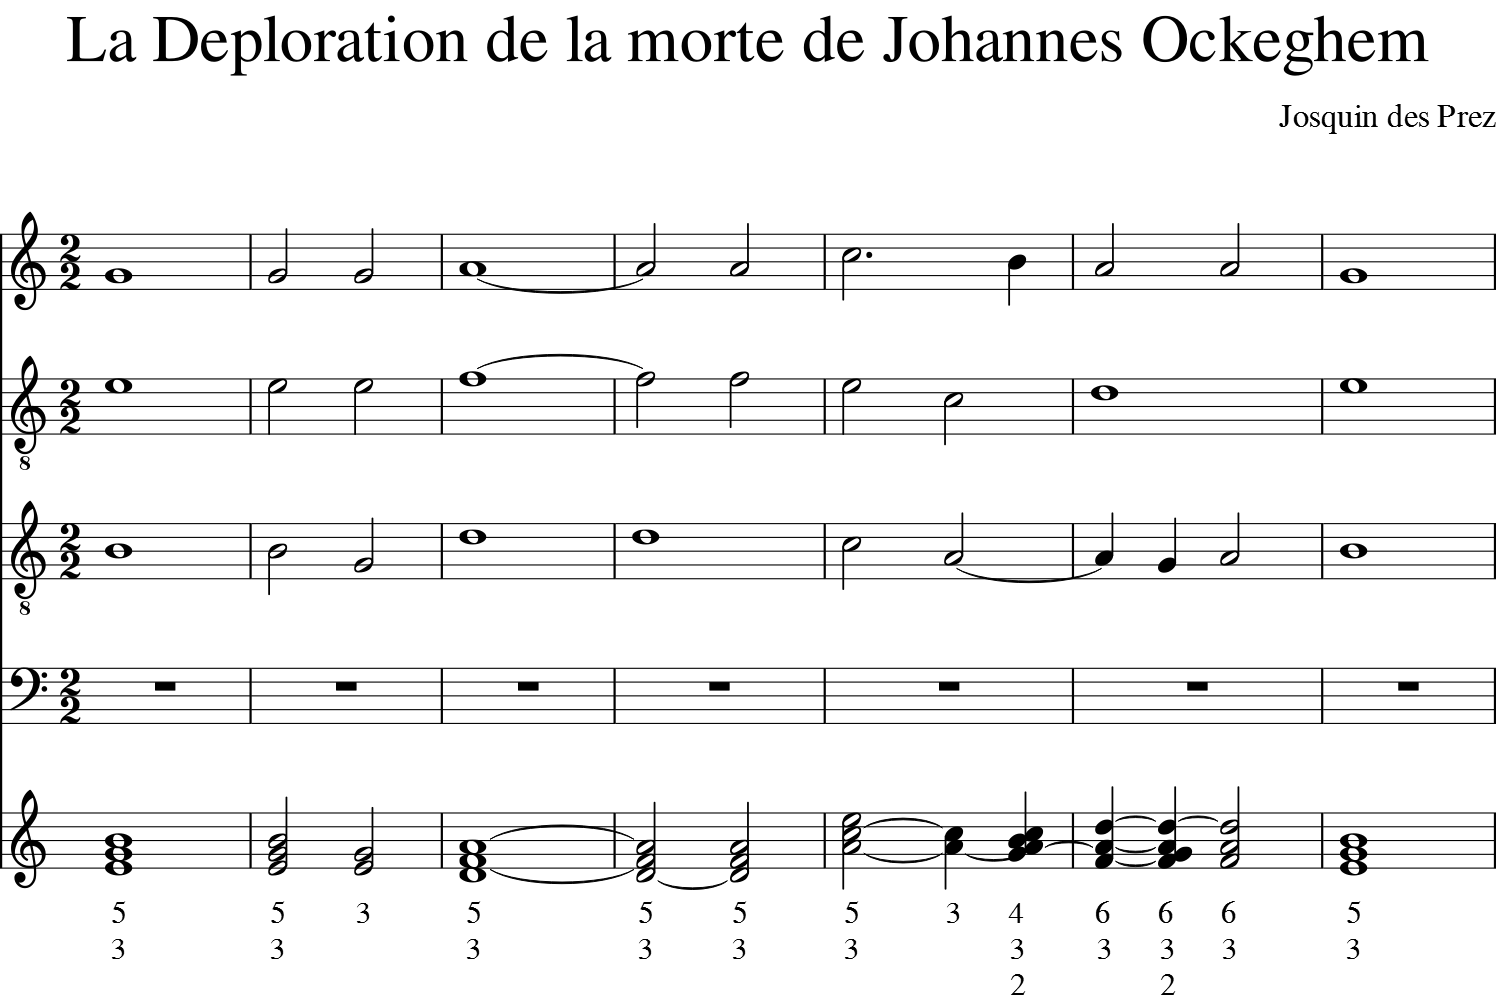

In [11]:
#add interval annotations
for c in reduction.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals()

scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[4]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()

In [4]:
s = corpus.parse('bwv66.6')

In [5]:
sChords = s.chordify()
sChords

<music21.stream.Part Soprano>

In [6]:
sFlat = sChords.flat
sFlat

sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords

displayPart = stream.Part(id='displayPart')
displayPart

<music21.stream.Part displayPart>

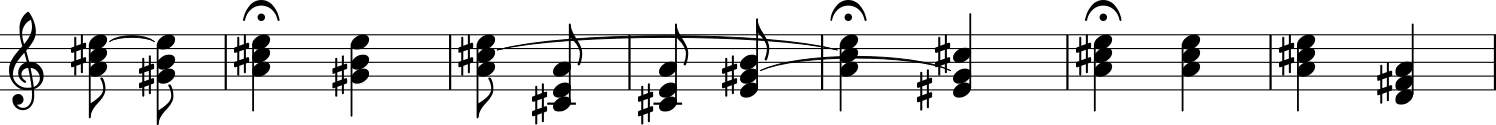

In [7]:
# Displays all chords in the piece that are considered triads or 7ths built on the key of A

def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)
        
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)
    
displayPart.show()

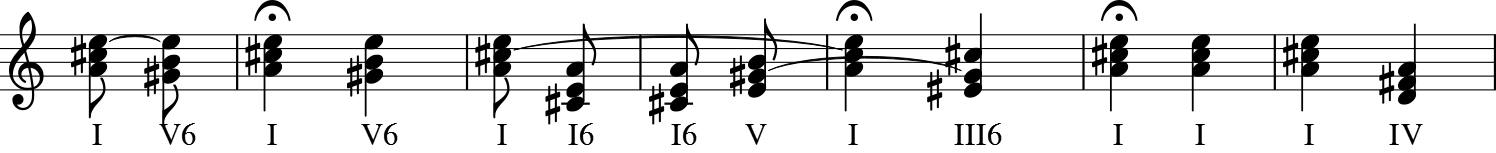

In [8]:
#now with roman numerals attached
keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))

displayPart.show()


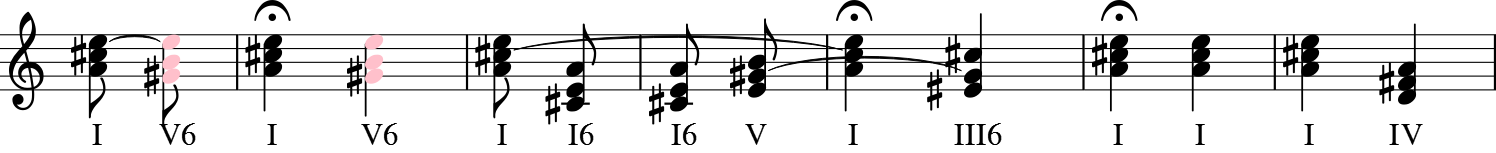

In [17]:
#color code all V6 chords
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'V6':
        c.style.color = 'pink'
        for x in c.derivation.chain():
            x.style.color = 'pink'

displayPart.show()